In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import BatchNormalization,MaxPooling2D,Flatten,Dropout,Conv2D,Input,Dense,GlobalMaxPooling2D
from tensorflow.keras.models import Model

In [2]:
cifar10 = tf.keras.datasets.cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

#normalizing data
x_train, x_test = x_train / 255.0, x_test / 255.0
y_train, y_test = y_train.flatten(), y_test.flatten()
print(x_train.shape)
print(y_train.shape)

170498071/170498071 [==============================] - 3s 0us/step
(50000, 32, 32, 3)
(50000,)


In [3]:
#the number of classes
x_train[0]
k=len(set(y_train))
print(k)

10


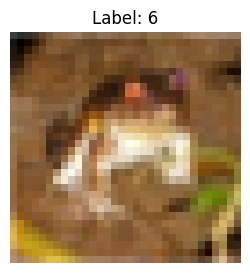

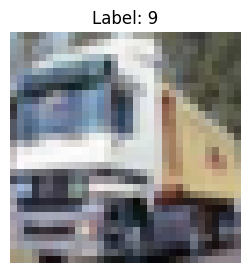

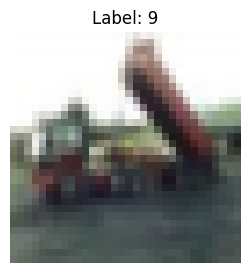

In [4]:
import matplotlib.pyplot as plt

# Display the first three images from x_train
for i in range(3):
    plt.figure(figsize=(3, 3))
    plt.imshow(x_train[i])
    plt.title(f'Label: {y_train[i]}')
    plt.axis('off')
    plt.show()

In [5]:
i=Input(shape=x_train[0].shape)

x=Conv2D(32,(3,3),padding='same',activation='relu')(i)
x=BatchNormalization()(x)
x=Conv2D(32,(3,3),padding='same',activation='relu')(x)
x=BatchNormalization()(x)
x=MaxPooling2D()(x)

x=Conv2D(64,(3,3),padding='same',activation='relu')(i)
x=BatchNormalization()(x)
x=Conv2D(64,(3,3),padding='same',activation='relu')(x)
x=BatchNormalization()(x)
x=MaxPooling2D()(x)

x=Conv2D(128,(3,3),padding='same',activation='relu')(i)
x=BatchNormalization()(x)
x=Conv2D(128,(3,3),padding='same',activation='relu')(x)
x=BatchNormalization()(x)
x=MaxPooling2D()(x)

x=Flatten()(x)
x=Dropout(0.2)(x)
x=Dense(1024,activation='relu')(x)
x=Dropout(0.2)(x)
x=Dense(k,activation='softmax')(x)
model=Model(i,x)

In [6]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
batch_size = 32
data_generator = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
train_generator=data_generator.flow(x_train,y_train,batch_size)
steps_per_epoch = x_train.shape[0] // batch_size

In [ ]:
r=model.fit_generator(train_generator,
                      validation_data=(x_test,y_test),
                      steps_per_epoch=steps_per_epoch,
                      epochs=20
                      )

<ipython-input-8-f5d61f20f142>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r=model.fit_generator(train_generator,


Epoch 1/20
1562/1562 [==============================] - 58s 30ms/step - loss: 2.1450 - accuracy: 0.2943 - val_loss: 1.7693 - val_accuracy: 0.3721
Epoch 2/20
1562/1562 [==============================] - 45s 29ms/step - loss: 1.7052 - accuracy: 0.3712 - val_loss: 1.6105 - val_accuracy: 0.4386
Epoch 3/20
1562/1562 [==============================] - 46s 29ms/step - loss: 1.6071 - accuracy: 0.4127 - val_loss: 1.4975 - val_accuracy: 0.4651
Epoch 4/20
1562/1562 [==============================] - 45s 29ms/step - loss: 1.5556 - accuracy: 0.4315 - val_loss: 1.2823 - val_accuracy: 0.5464
Epoch 5/20
1562/1562 [==============================] - 45s 29ms/step - loss: 1.5081 - accuracy: 0.4504 - val_loss: 1.5199 - val_accuracy: 0.4727
Epoch 6/20
1562/1562 [==============================] - 46s 29ms/step - loss: 1.4832 - accuracy: 0.4613 - val_loss: 1.2806 - val_accuracy: 0.5569
Epoch 7/20
1562/1562 [==============================] - 44s 28ms/step - loss: 1.4575 - accuracy: 0.4682 - val_loss: 1.3197 -

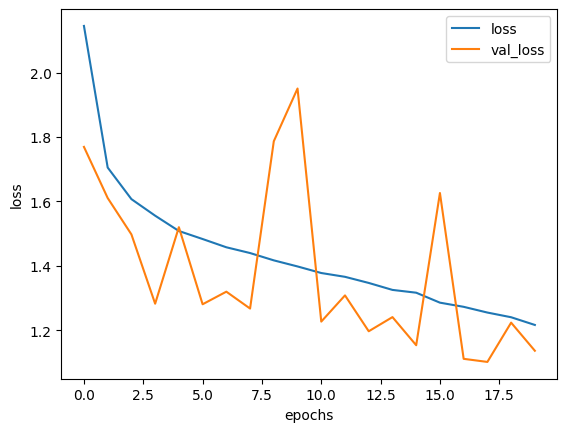

In [ ]:
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.ylabel("loss")
plt.xlabel("epochs")
plt.legend(loc=0)

1/1 [==============================] - 0s 198ms/step


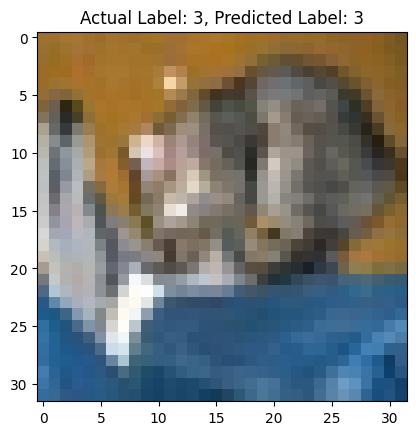

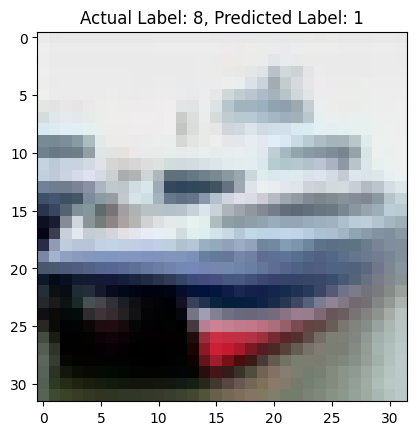

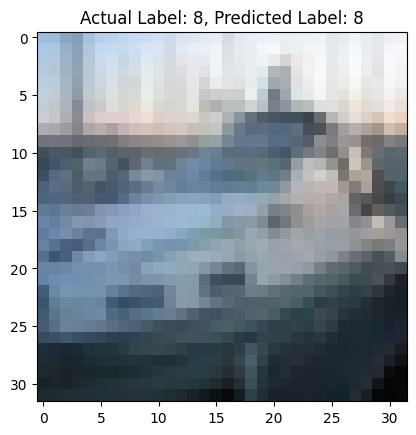

In [ ]:
# Make predictions for the first three images
predictions = model.predict(x_test[:3])

# Convert predictions to class labels (index with the maximum probability)
predicted_labels = np.argmax(predictions, axis=1)
for i in range(3):
    plt.figure()
    plt.imshow(x_test[i], cmap='gray')
    plt.title(f"Actual Label: {y_test[i]}, Predicted Label: {predicted_labels[i]}")
    plt.show()

313/313 [==============================] - 1s 3ms/step
confusion matrix without normalization
cm


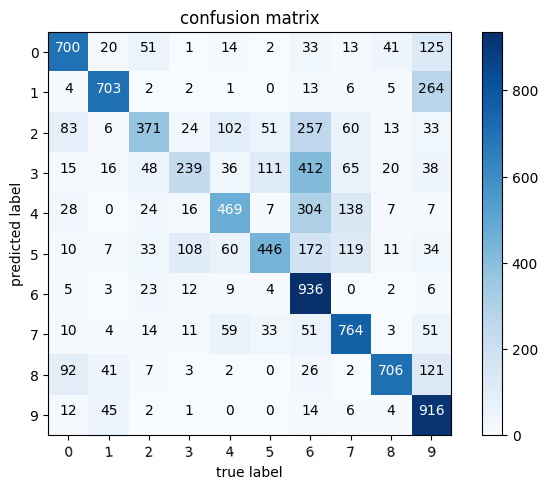

In [ ]:
#ploting confusion matrix
from sklearn.metrics import confusion_matrix
import itertools
def plot_confusion_matrix(cm,classes,normalise=False,
                         title='confusion matrix',
                         cmap=plt.cm.Blues):
  ''' this function prints and plots the confusion matrix
  normalization can be applied by setting normalize=True
  '''
  if normalise:
      cm=cm.astype('float')/cm.sum(axis=1)[:,np.new_axis]
      print("normalize confusion matrix")
  else:
        print("confusion matrix without normalization")
        print("cm")
  plt.imshow(cm,interpolation='nearest',cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks=np.arange(len(classes))
  plt.xticks(tick_marks,classes,rotation=5)
  plt.yticks(tick_marks,classes)

  fmt='.2f' if normalise else "d"
  thresh=cm.max()/2
  for i ,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
    plt.text(j,i,format(cm[i,j],fmt),horizontalalignment='center',color='white'if cm[i,j] >thresh else "black" )
  plt.tight_layout()
  plt.xlabel("true label")
  plt.ylabel('predicted label')
  plt.show()



p_test=model.predict(x_test).argmax(axis=1)
cm=confusion_matrix(y_test,p_test)
plot_confusion_matrix(cm,list(range(10)))

In [ ]:
#drive link:https://drive.google.com/drive/folders/103dSV4O1hJueqbFS_28YQQdZTlLvuYXs